**Task-1:** Create an 11x11 image and sequentially fill pixel values from 1 to 121 (i.e. first pixel is gray value 1,
second pixel is gray value 2 and so on.)

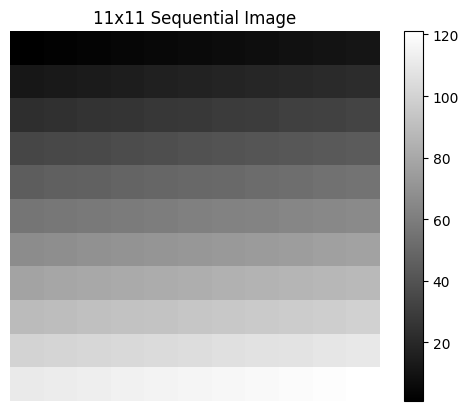

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create an 11x11 array and fill it with values from 1 to 121
image = np.arange(1, 122).reshape(11, 11)

# Display the image
plt.imshow(image, cmap='gray', vmin=1, vmax=121)
plt.colorbar()  # Show a color bar to indicate pixel values
plt.title('11x11 Sequential Image')
plt.axis('off')  # Hide the axes
plt.show()


**Task-2**: Now implement the code to perform the traditional averaging only for the center row with a 5x5
mask of 1’s and count the number of operations required in terms of additions, subtractions,
multiplications, and divisions. Zero pad the image accordingly. Display the output array as well.

In [38]:
def traditional_averaging(image, mask_size=5):
    # Define mask dimensions and padding
    padding = mask_size // 2
    padded_image = np.pad(image, ((0, 0), (padding, padding)), mode='constant', constant_values=0)
    
    # Extract the center row
    center_row = padded_image[image.shape[0] // 2]
    output_row = np.zeros(len(center_row) - 2 * padding)
    
    # Perform averaging
    num_additions = 0
    num_divisions = 0
    for i in range(padding, len(center_row) - padding):
        # Neighborhood sum
        neighborhood_sum = np.sum(center_row[i - padding:i + padding + 1])
        num_additions += (mask_size * mask_size) - 1  # Additions for this neighborhood (4 additions for 5 pixels in 1D)

        # Average
        output_row[i - padding] = neighborhood_sum // mask_size
        num_divisions += 1  # Division for averaging
    
    return output_row, num_additions, num_divisions


# Main function
def main():
    # Part (c)
    print("11x11 Image:\n", image)

    # Part (d)
    output_row, num_additions, num_divisions = traditional_averaging(image)
    print("\nOutput Row (Center Row After Traditional Averaging):\n", output_row)
    print(f"\nNumber of operations required:")
    print(f"Additions: {num_additions}")
    print(f"Divisions: {num_divisions}")

# Execute the code
if __name__ == "__main__":
    main()

11x11 Image:
 [[  1   2   3   4   5   6   7   8   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22]
 [ 23  24  25  26  27  28  29  30  31  32  33]
 [ 34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63  64  65  66]
 [ 67  68  69  70  71  72  73  74  75  76  77]
 [ 78  79  80  81  82  83  84  85  86  87  88]
 [ 89  90  91  92  93  94  95  96  97  98  99]
 [100 101 102 103 104 105 106 107 108 109 110]
 [111 112 113 114 115 116 117 118 119 120 121]]

Output Row (Center Row After Traditional Averaging):
 [34. 46. 58. 59. 60. 61. 62. 63. 64. 51. 39.]

Number of operations required:
Additions: 264
Divisions: 11


**Task-3**: Repeat step d, but with the optimized averaging approach.

In [40]:
# Part (d) - Optimized neighborhood averaging for the center row
# Part (d) - Optimized neighborhood averaging for the center row
def optimized_averaging(image, mask_size=5):
    # Define mask dimensions and padding
    padding = mask_size // 2
    padded_image = np.pad(image, ((0, 0), (padding, padding)), mode='constant', constant_values=0)
    # padded_image = np.pad(image, ((0, 0), (padding, padding)), mode='edge')
    
    # Extract the center row
    center_row = padded_image[image.shape[0] // 2]
    output_row = np.zeros(center_row.shape[0] - 2 * padding)
    
    # Initialize the first average
    initial_sum = np.sum(center_row[:mask_size])
    current_average = initial_sum // mask_size
    output_row[0] = current_average
    
    # Count operations
    num_additions = (mask_size*mask_size) - 1  # Initial sum requires mask_size - 1 additions
    num_subtractions = 0
    num_divisions = 1  # Initial division
    
    # Perform optimized averaging for the rest of the row
    for i in range(1, len(output_row)):
        # Update the average: Add the new pixel and subtract the old pixel
        current_average += (center_row[i + padding] - center_row[i - 1])//mask_size

        num_additions += (mask_size)  # Add new pixel
        num_subtractions += (mask_size) # Remove old pixel
        num_divisions += 1  # Division for averaging
        
        # Store the result
        output_row[i] = current_average
    for i in range(padding):
        j = i + 1
        num_additions -= (mask_size*j)
    num_subtractions -= mask_size
    return output_row, num_additions, num_subtractions, num_divisions

# Main function
def main():
    # Part (c)
    print("11x11 Image:\n", image)

    # Part (d) - Optimized Averaging
    output_row, num_additions, num_subtractions, num_divisions = optimized_averaging(image)
    print("\nOutput Row (Center Row After Optimized Averaging):\n", output_row)
    print(f"\nNumber of operations required:")
    print(f"Additions: {num_additions}")
    print(f"Subtractions: {num_subtractions}")
    print(f"Divisions: {num_divisions}")

# Execute the code
if __name__ == "__main__":
    main()


11x11 Image:
 [[  1   2   3   4   5   6   7   8   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22]
 [ 23  24  25  26  27  28  29  30  31  32  33]
 [ 34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63  64  65  66]
 [ 67  68  69  70  71  72  73  74  75  76  77]
 [ 78  79  80  81  82  83  84  85  86  87  88]
 [ 89  90  91  92  93  94  95  96  97  98  99]
 [100 101 102 103 104 105 106 107 108 109 110]
 [111 112 113 114 115 116 117 118 119 120 121]]

Output Row (Center Row After Optimized Averaging):
 [34. 45. 56. 56. 56. 56. 56. 56. 56. 56. 56.]

Number of operations required:
Additions: 59
Subtractions: 45
Divisions: 11
